In [ ]:
!nvidia-smi

Fri Jul 16 08:16:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls /content/drive/MyDrive/ML/logml/point2mesh/

1.10.0.tar.gz  cub-1.10.0  environment.yml  Manifold	__pycache__  scripts
build	       data	   LICENSE	    models	README.md    utils.py
checkpoints    docs	   main.py	    options.py	Runs.ipynb


In [ ]:
cd /content/drive/MyDrive/ML/logml/point2mesh/

/content/drive/MyDrive/ML/logml/point2mesh


In [ ]:
!ls

1.10.0.tar.gz  cub-1.10.0  environment.yml  Manifold	__pycache__  scripts
build	       data	   LICENSE	    models	README.md    utils.py
checkpoints    docs	   main.py	    options.py	Runs.ipynb


In [ ]:
!python --version

Python 3.7.10


In [ ]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.7") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{torch.__version__[0:5:2]}"
        ])
        !pip install pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   118  100   118    0     0   1456      0 --:--:-- --:--:-- --:--:--  1456
100  404k    0  404k    0     0   793k      0 --:--:-- --:--:-- --:--:-- 35.8M
  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-_f2vis5a
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-_f2vis5a
  Running command git checkout -q 3c15a6c2469249c8b90a4f3e41e34350b8051b92
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 645kB 39.3MB/s 
  Created wheel for pytorch3d: filename=pytorch3d-0.4.0-cp37-cp37m-linux_x86_64.whl size=24548104 sha256=9cc6c6e21ac0962f8b577fdd039ec96b634e3fdd7a3130255ed54384e2fecb42
  Stored in directory: /tmp/pip-ephem-wheel-cache-ic4dm08w/wheels/89/69/08/d864f516508b5d943259c6088baa150eb

In [ ]:
!pwd

/content/drive/My Drive/ML/logml/point2mesh


In [ ]:
!git clone --recursive -j8 git://github.com/hjwdzh/Manifold

Cloning into 'Manifold'...
remote: Enumerating objects: 2121, done.
remote: Total 2121 (delta 0), reused 0 (delta 0), pack-reused 2121
Receiving objects: 100% (2121/2121), 4.45 MiB | 6.98 MiB/s, done.
Resolving deltas: 100% (521/521), done.
Checking out files: 100% (1965/1965), done.


In [ ]:
cd Manifold/

/content/drive/My Drive/ML/logml/point2mesh/Manifold


In [ ]:
!mkdir build

In [ ]:
cd build/

/content/drive/My Drive/ML/logml/point2mesh/Manifold/build


In [ ]:
!cmake .. -DCMAKE_BUILD_TYPE=Release

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /content/drive/My Drive/ML/logml/point2mesh/Manifold/build


In [ ]:
!make

Scanning dependencies of target simplify
[-14%] Building CXX object CMakeFiles/simplify.dir/src/simplify.cpp.o
In file included from /content/drive/My Drive/ML/logml/point2mesh/Manifold/3rd/igl/connect_boundary_to_infinity.h:54:0,
                 from /content/drive/My Drive/ML/logml/point2mesh/Manifold/3rd/igl/decimate.cpp:15,
                 from /content/drive/My Drive/ML/logml/point2mesh/Manifold/3rd/igl/decimate.h:252,
                 from /content/drive/My Drive/ML/logml/point2mesh/Manifold/src/simplify.cpp:7:
/content/drive/My Drive/ML/logml/point2mesh/Manifold/3rd/igl/connect_boundary_to_infinity.cpp: In function ‘void igl::connect_boundary_to_infinity(const Eigen::PlainObjectBase<Derived>&, typename DerivedF::Scalar, Eigen::PlainObjectBase<Derived>&)’:
/content/drive/My Drive/ML/logml/point2mesh/Manifold/3rd/igl/connect_boundary_to_infinity.cpp:28:70: warning: typedef ‘VectorXI’ locally defined but not used [-Wunused-local-typedefs]
   typedef Eigen::Matrix<typename Derived

In [ ]:
cd ../..


/content/drive/My Drive/ML/logml/point2mesh


In [ ]:
!ls

 1.10.0.tar.gz	 docs		   models		   Runs.ipynb
 build		 environment.yml   options.py		   scripts
 checkpoints	 LICENSE	  'Point 2 Mesh.gslides'   utils.py
 cub-1.10.0	 main.py	   __pycache__
 data		 Manifold	   README.md


In [ ]:
import torch
print(torch.__version__)


1.9.0+cu102


In [ ]:
import torch
from models.layers.mesh import Mesh, PartMesh
from models.networks import init_net, sample_surface, local_nonuniform_penalty
import utils
import numpy as np
from models.losses import chamfer_distance, BeamGapLoss
from options import Options
import time
import os

In [ ]:
!bash ./scripts/get_data.sh

--2021-07-14 11:42:58--  https://www.dropbox.com/s/nn9hsww6mr0zccm/data.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nn9hsww6mr0zccm/data.tar [following]
--2021-07-14 11:42:58--  https://www.dropbox.com/s/raw/nn9hsww6mr0zccm/data.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucacc02eecae3d7fc0d240b44647.dl.dropboxusercontent.com/cd/0/inline/BSSA_sF0NqGE8sVmOk5awsplax3_ub-AlWaFY0ZvycEzlaQLx6peXJhU6NplyL2SqI7XuEe1vV2p0O3ZLoiG7aS5RjBdUdURqfhuvK3LoryoCu0mOp9suH9fNz5ZgIzP72lxDEQTRYAwCK0dVUprXgNL/file# [following]
--2021-07-14 11:42:58--  https://ucacc02eecae3d7fc0d240b44647.dl.dropboxusercontent.com/cd/0/inline/BSSA_sF0NqGE8sVmOk5awsplax3_ub-AlWaFY0ZvycEzlaQLx6peXJhU6NplyL2SqI7XuEe1vV2p0O3ZLoiG7aS5RjBdUdURqfhuvK

In [ ]:
!bash ./scripts/examples/giraffe.sh

Streaming output truncated to the last 5000 lines.
giraffe.ply; iter: 1051 out of: 6000; loss: -0.1417; sample count: 15637; time: 0.83
giraffe.ply; iter: 1052 out of: 6000; loss: -0.1435; sample count: 15650; time: 0.82
giraffe.ply; iter: 1053 out of: 6000; loss: -0.1429; sample count: 15662; time: 0.79
giraffe.ply; iter: 1054 out of: 6000; loss: -0.1408; sample count: 15675; time: 0.82
giraffe.ply; iter: 1055 out of: 6000; loss: -0.1428; sample count: 15687; time: 0.79
giraffe.ply; iter: 1056 out of: 6000; loss: -0.1409; sample count: 15700; time: 0.82
giraffe.ply; iter: 1057 out of: 6000; loss: -0.1419; sample count: 15712; time: 0.79
giraffe.ply; iter: 1058 out of: 6000; loss: -0.1434; sample count: 15725; time: 0.83
giraffe.ply; iter: 1059 out of: 6000; loss: -0.1406; sample count: 15737; time: 0.79
giraffe.ply; iter: 1060 out of: 6000; loss: -0.1435; sample count: 15750; time: 0.81
giraffe.ply; iter: 1061 out of: 6000; loss: -0.1426; sample count: 15762; time: 0.78
giraffe.ply; i

In [ ]:
from pytorch3d.io import load_objs_as_meshes, load_obj
from pytorch3d.structures import Meshes
from pytorch3d.ops import sample_points_from_meshes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)

In [ ]:
def get_mesh(meshdir):
  # We read the target 3D model using load_obj
  verts, faces, aux = load_obj(meshdir)

  # verts is a FloatTensor of shape (V, 3) where V is the number of vertices in the mesh
  # faces is an object which contains the following LongTensors: verts_idx, normals_idx and textures_idx
  # For this tutorial, normals and textures are ignored.
  faces_idx = faces.verts_idx.to('cpu')
  verts = verts.to('cpu')

  # We scale normalize and center the target mesh to fit in a sphere of radius 1 centered at (0,0,0). 
  # (scale, center) will be used to bring the predicted mesh to its original center and scale
  # Note that normalizing the target mesh, speeds up the optimization but is not necessary!
  center = verts.mean(0)
  verts = verts - center
  scale = max(verts.abs().max(0)[0])
  verts = verts / scale

  verts_rgb = torch.ones_like(verts)[None] # (1, V, 3)
  textures = TexturesVertex(verts_features=verts_rgb.to('cpu'))

  # We construct a Meshes structure for the target mesh
  trg_mesh = Meshes(verts=[verts], faces=[faces_idx], textures=textures)
  return trg_mesh

In [ ]:
def plot_pointcloud(mesh, title="", sample=True):
    # Sample points uniformly from the surface of the mesh.
    if sample:
      points = sample_points_from_meshes(mesh, 5000)
      x, y, z = points.clone().detach().cpu().squeeze().unbind(1)
    else:
      points = mesh
      x, y, z = points[:,0], points[:,1], points[:,2]
    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.scatter3D(x, z, -y)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_zlabel('y')
    ax.set_title(title)
    ax.view_init(190, 30)
    plt.show()

In [ ]:
trg_mesh_100 = get_mesh(f'checkpoints/giraffe/recon_iter_100.obj')
trg_mesh_1000 = get_mesh(f'checkpoints/giraffe/recon_iter_1000.obj')
trg_mesh_3000 = get_mesh(f'checkpoints/giraffe/recon_iter_3000.obj')
trg_mesh_final = get_mesh(f'checkpoints/giraffe/last_recon.obj')


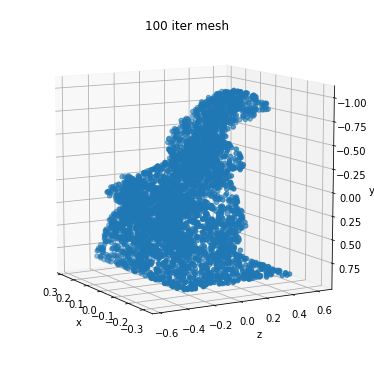

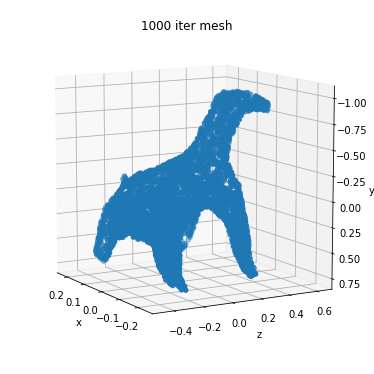

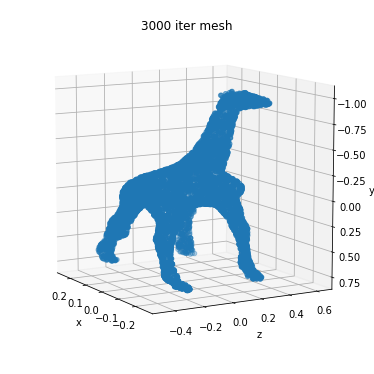

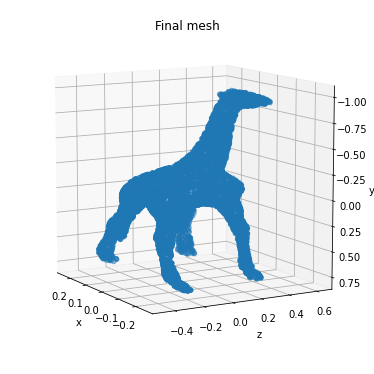

In [ ]:
plot_pointcloud(trg_mesh_100, "100 iter mesh")
plot_pointcloud(trg_mesh_1000, "1000 iter mesh")
plot_pointcloud(trg_mesh_3000, "3000 iter mesh")
plot_pointcloud(trg_mesh_final, "Final mesh")


In [ ]:
# Initialize a camera.
# With world coordinates +Y up, +X left and +Z in, the front of the cow is facing the -Z direction. 
# So we move the camera by 180 in the azimuth direction so it is facing the front of the cow. 
# R, T = look_at_view_transform(2.7, 30, 20) 
R, T = look_at_view_transform(2, 190, 30+90) 
cameras = FoVPerspectiveCameras(device='cpu', R=R, T=T)

# Define the settings for rasterization and shading. Here we set the output image to be of size
# 512x512. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# and blur_radius=0.0. We also set bin_size and max_faces_per_bin to None which ensure that 
# the faster coarse-to-fine rasterization method is used. Refer to rasterize_meshes.py for 
# explanations of these parameters. Refer to docs/notes/renderer.md for an explanation of 
# the difference between naive and coarse-to-fine rasterization. 
raster_settings = RasterizationSettings(
    image_size=512, 
    blur_radius=0.0, 
    faces_per_pixel=1, 
)

# Place a point light in front of the object. As mentioned above, the front of the cow is facing the 
# -z direction. 
lights = PointLights(device='cpu', location=[[0.0, 0.0, -3.0]])

# Create a Phong renderer by composing a rasterizer and a shader. The textured Phong shader will 
# interpolate the texture uv coordinates for each vertex, sample from a texture image and 
# apply the Phong lighting model
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras, 
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device='cpu', 
        cameras=cameras,
        lights=lights
    )
)

In [ ]:
def render_mesh(mesh):
  images = renderer(mesh)
  plt.figure(figsize=(6, 6))
  plt.imshow(images[0, ..., :3].cpu().numpy())
  plt.axis("off");


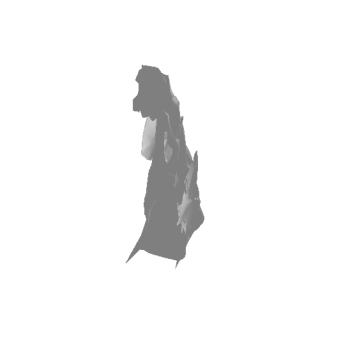

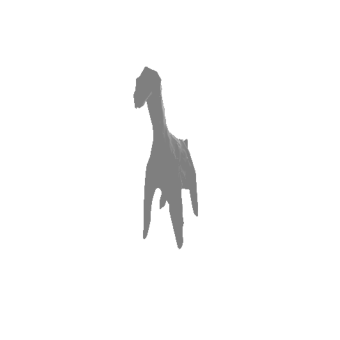

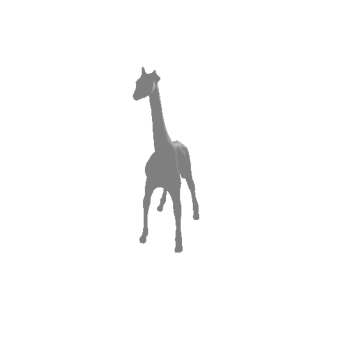

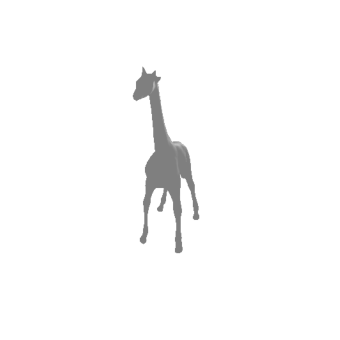

In [ ]:
render_mesh(trg_mesh_100)
render_mesh(trg_mesh_1000)
render_mesh(trg_mesh_3000)
render_mesh(trg_mesh_final)


## Cool, the giraffe one seems to work well. 

## Lets try the method out with a spherical mesh as the input

In [ ]:
from pytorch3d.utils import ico_sphere
from pytorch3d.io import save_obj

In [ ]:
sphere_mesh = ico_sphere(4)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [ ]:
print(sphere_mesh.verts_packed().shape)
print(torch.max(sphere_mesh.verts_packed(), dim=0))
print(torch.min(sphere_mesh.verts_packed(), dim=0))

torch.Size([2562, 3])
torch.return_types.max(
values=tensor([1., 1., 1.]),
indices=tensor([40, 12, 30]))
torch.return_types.min(
values=tensor([-1., -1., -1.]),
indices=tensor([41, 21, 35]))


In [ ]:
!ls

1.10.0.tar.gz  cub-1.10.0  environment.yml  Manifold	__pycache__  scripts
build	       data	   LICENSE	    models	README.md    utils.py
checkpoints    docs	   main.py	    options.py	Runs.ipynb


In [ ]:
save_obj('./data/ico_sphere_level_4.obj', ico_sphere(4).verts_packed()/2, ico_sphere(4).faces_packed())


In [ ]:
#self.args = parser.parse_args() self.args, self.unknown = parser.parse_known_args()

In [ ]:
#python main.py --input-pc ./data/giraffe.ply \
# --initial-mesh ./data/giraffe_initmesh.obj \
# --save-path ./checkpoints/giraffe \
# --iterations 6000

In [ ]:
import torch
from models.layers.mesh import Mesh, PartMesh
from models.networks import init_net, sample_surface, local_nonuniform_penalty
import utils
import numpy as np
from models.losses import chamfer_distance, BeamGapLoss
from options import Options
import time
import os

In [ ]:
%run options.py

In [ ]:
options = Options()
opts = options.args

torch.manual_seed(opts.torch_seed)
device = torch.device('cuda:{}'.format(opts.gpu) if torch.cuda.is_available() else torch.device('cpu'))
print('device: {}'.format(device))

device: cuda:0


In [ ]:
opts.iterations = 6000
#opts.upsamp = 100
opts.input_pc = './data/giraffe.ply'
opts.initial_mesh = './data/ico_sphere_level_4.obj'
opts.save_path = './checkpoints/giraffe_sphere'


In [ ]:
opts

Namespace(ang_wt=0.1, beamgap_iterations=0, beamgap_modulo=1, begin_samples=15000, convs=[16, 32, 64, 64, 128], export_interval=100, faces_to_part=[8000, 16000, 20000], global_step=False, gpu=0, init_weights=0.002, initial_mesh='./data/ico_sphere_level_4.obj', input_pc='./data/giraffe.ply', iterations=6000, leaky_relu=0.01, local_non_uniform=0.1, lr=0.00011, manifold_always=False, manifold_res=100000, max_faces=10000, overlap=0, pools=[0.0, 0.0, 0.0, 0.0], res_blocks=3, samples=25000, save_path='./checkpoints/giraffe_sphere', torch_seed=5, transfer_data=False, unoriented=False, upsamp=1000)

In [ ]:
if not os.path.exists(opts.save_path):
    os.makedirs(opts.save_path)

In [ ]:
# initial mesh
mesh = Mesh(opts.initial_mesh, device=device, hold_history=True)

/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.vei = torch.from_numpy(np.concatenate(np.array(self.vei)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.nvsi = torch.Tensor(np.concatenate(np.array(self.nvsi)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested seque

In [ ]:
# input point cloud
input_xyz, input_normals = utils.read_pts(opts.input_pc)
# normalize point cloud based on initial mesh
input_xyz /= mesh.scale
input_xyz += mesh.translations[None, :]
input_xyz = torch.Tensor(input_xyz).type(options.dtype()).to(device)[None, :, :]
input_normals = torch.Tensor(input_normals).type(options.dtype()).to(device)[None, :, :]

In [ ]:
opts.initial_mesh

'./data/ico_sphere_level_4.obj'

In [ ]:
part_mesh = PartMesh(mesh, num_parts=options.get_num_parts(len(mesh.faces)), bfs_depth=opts.overlap)
print(f'number of parts {part_mesh.n_submeshes}')
net, optimizer, rand_verts, scheduler = init_net(mesh, part_mesh, device, opts)

beamgap_loss = BeamGapLoss(device)

if opts.beamgap_iterations > 0:
    print('beamgap on')
    beamgap_loss.update_pm(part_mesh, torch.cat([input_xyz, input_normals], dim=-1))

/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.vei = torch.from_numpy(np.concatenate(np.array(self.vei)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.nvsi = torch.Tensor(np.concatenate(np.array(self.nvsi)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested seque

number of parts 1


In [ ]:
%run utils.py

In [ ]:
for i in range(opts.iterations):
    num_samples = options.get_num_samples(i % opts.upsamp)
    if opts.global_step:
        optimizer.zero_grad()
    start_time = time.time()
    for part_i, est_verts in enumerate(net(rand_verts, part_mesh)):
        if not opts.global_step:
            optimizer.zero_grad()
        part_mesh.update_verts(est_verts[0], part_i)
        num_samples = options.get_num_samples(i % opts.upsamp)
        recon_xyz, recon_normals = sample_surface(part_mesh.main_mesh.faces, part_mesh.main_mesh.vs.unsqueeze(0), num_samples)
        # calc chamfer loss w/ normals
        recon_xyz, recon_normals = recon_xyz.type(options.dtype()), recon_normals.type(options.dtype())
        xyz_chamfer_loss, normals_chamfer_loss = chamfer_distance(recon_xyz, input_xyz, x_normals=recon_normals, y_normals=input_normals,
                                              unoriented=opts.unoriented)

        if (i < opts.beamgap_iterations) and (i % opts.beamgap_modulo == 0):
            loss = beamgap_loss(part_mesh, part_i)
        else:
            loss = (xyz_chamfer_loss + (opts.ang_wt * normals_chamfer_loss))
        if opts.local_non_uniform > 0:
            loss += opts.local_non_uniform * local_nonuniform_penalty(part_mesh.main_mesh).float()
        loss.backward()
        if not opts.global_step:
            optimizer.step()
            scheduler.step()
        part_mesh.main_mesh.vs.detach_()
    if opts.global_step:
        optimizer.step()
        scheduler.step()
    end_time = time.time()

    if i % 1 == 0:
        print(f'{os.path.basename(opts.input_pc)}; iter: {i} out of: {opts.iterations}; loss: {loss.item():.4f};'
              f' sample count: {num_samples}; time: {end_time - start_time:.2f}')
    if i % opts.export_interval == 0 and i > 0:
        print('exporting reconstruction... current LR: {}'.format(optimizer.param_groups[0]['lr']))
        with torch.no_grad():
            part_mesh.export(os.path.join(opts.save_path, f'recon_iter_{i}.obj'))

    if (i > 0 and (i + 1) % opts.upsamp == 0):
        mesh = part_mesh.main_mesh
        num_faces = int(np.clip(len(mesh.faces) * 1.5, len(mesh.faces), opts.max_faces))

        if num_faces > len(mesh.faces) or opts.manifold_always:
            # up-sample mesh
            mesh = utils.manifold_upsample(mesh, opts.save_path, Mesh,
                                           num_faces=min(num_faces, opts.max_faces),
                                           res=opts.manifold_res, simplify=True)

            part_mesh = PartMesh(mesh, num_parts=options.get_num_parts(len(mesh.faces)), bfs_depth=opts.overlap)
            print(f'upsampled to {len(mesh.faces)} faces; number of parts {part_mesh.n_submeshes}')
            net, optimizer, rand_verts, scheduler = init_net(mesh, part_mesh, device, opts)
            if i < opts.beamgap_iterations:
                print('beamgap updated')
                beamgap_loss.update_pm(part_mesh, input_xyz)

with torch.no_grad():
    mesh.export(os.path.join(opts.save_path, 'last_recon.obj'))

giraffe.ply; iter: 0 out of: 6000; loss: 0.3260; sample count: 15000; time: 1.04
giraffe.ply; iter: 1 out of: 6000; loss: 0.3261; sample count: 15012; time: 0.85
giraffe.ply; iter: 2 out of: 6000; loss: 0.3255; sample count: 15025; time: 0.86
giraffe.ply; iter: 3 out of: 6000; loss: 0.3280; sample count: 15037; time: 0.91
giraffe.ply; iter: 4 out of: 6000; loss: 0.3251; sample count: 15050; time: 0.88
giraffe.ply; iter: 5 out of: 6000; loss: 0.3228; sample count: 15062; time: 0.85
giraffe.ply; iter: 6 out of: 6000; loss: 0.3071; sample count: 15075; time: 0.86
giraffe.ply; iter: 7 out of: 6000; loss: 0.2859; sample count: 15087; time: 0.85
giraffe.ply; iter: 8 out of: 6000; loss: 0.2699; sample count: 15100; time: 0.90
giraffe.ply; iter: 9 out of: 6000; loss: 0.2431; sample count: 15112; time: 0.85
giraffe.ply; iter: 10 out of: 6000; loss: 0.2417; sample count: 15125; time: 0.85
giraffe.ply; iter: 11 out of: 6000; loss: 0.2351; sample count: 15137; time: 0.84
giraffe.ply; iter: 12 out 

/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.vei = torch.from_numpy(np.concatenate(np.array(self.vei)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.nvsi = torch.Tensor(np.concatenate(np.array(self.nvsi)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested seque

upsampled to 7680 faces; number of parts 1
giraffe.ply; iter: 1000 out of: 6000; loss: 0.1306; sample count: 15000; time: 1.56
exporting reconstruction... current LR: 0.00010999816666666667
giraffe.ply; iter: 1001 out of: 6000; loss: 0.1308; sample count: 15012; time: 1.33
giraffe.ply; iter: 1002 out of: 6000; loss: 0.1259; sample count: 15025; time: 1.41
giraffe.ply; iter: 1003 out of: 6000; loss: 0.1206; sample count: 15037; time: 1.35
giraffe.ply; iter: 1004 out of: 6000; loss: 0.1165; sample count: 15050; time: 1.69
giraffe.ply; iter: 1005 out of: 6000; loss: 0.1046; sample count: 15062; time: 1.40
giraffe.ply; iter: 1006 out of: 6000; loss: 0.1036; sample count: 15075; time: 1.34
giraffe.ply; iter: 1007 out of: 6000; loss: 0.1101; sample count: 15087; time: 1.35
giraffe.ply; iter: 1008 out of: 6000; loss: 0.0969; sample count: 15100; time: 1.42
giraffe.ply; iter: 1009 out of: 6000; loss: 0.0973; sample count: 15112; time: 1.35
giraffe.ply; iter: 1010 out of: 6000; loss: 0.0909; sa

KeyboardInterrupt: ignored

In [ ]:
input_point_cloud, input_normals = utils.read_pts(f'data/giraffe.ply')
print(input_point_cloud.shape)

(25000, 3)


In [ ]:
trg_mesh_initial = get_mesh(f'data/giraffe_initmesh.obj')
trg_mesh_100 = get_mesh(f'checkpoints/giraffe_sphere/recon_iter_100.obj')
trg_mesh_1000 = get_mesh(f'checkpoints/giraffe_sphere/recon_iter_1000.obj')
trg_mesh_3000 = get_mesh(f'checkpoints/giraffe_sphere/recon_iter_3000.obj')
trg_mesh_final = get_mesh(f'checkpoints/giraffe_sphere/recon_iter_4000.obj')


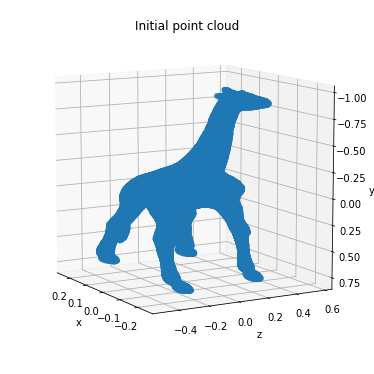

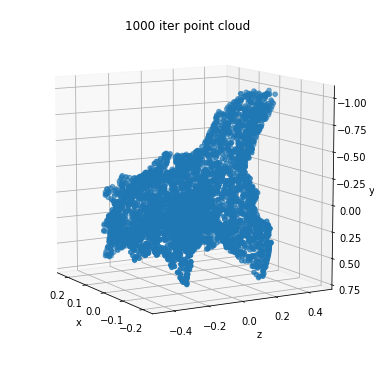

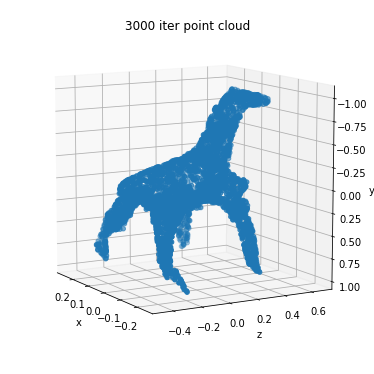

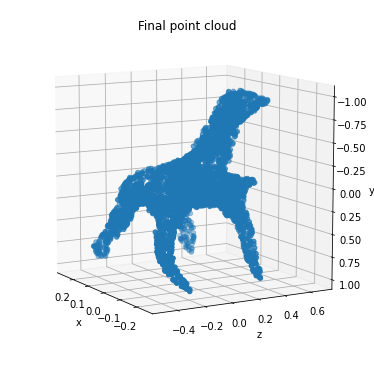

In [ ]:
plot_pointcloud(input_point_cloud, "Initial point cloud", sample=False)
plot_pointcloud(trg_mesh_1000, "1000 iter point cloud")
plot_pointcloud(trg_mesh_3000, "3000 iter point cloud")
plot_pointcloud(trg_mesh_final, "Final point cloud")


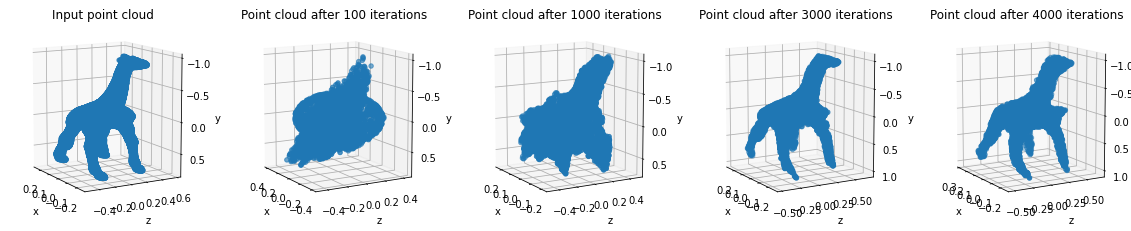

In [ ]:
# Sample points uniformly from the surface of the mesh.
fig = plt.figure(figsize=(20, 4))

ax = plt.subplot(151, projection='3d')
x, y, z = input_point_cloud[:,0], input_point_cloud[:,1], input_point_cloud[:,2]
ax.scatter(x, z, -y)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Input point cloud')
ax.view_init(190, 30)

ax = plt.subplot(152, projection='3d')
points = sample_points_from_meshes(trg_mesh_100, 5000)
x, y, z = points.clone().detach().cpu().squeeze().unbind(1)
ax.scatter(x, z, -y)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Point cloud after 100 iterations')
ax.view_init(190, 30)

ax = plt.subplot(153, projection='3d')
points = sample_points_from_meshes(trg_mesh_1000, 5000)
x, y, z = points.clone().detach().cpu().squeeze().unbind(1)
ax.scatter(x, z, -y)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Point cloud after 1000 iterations')
ax.view_init(190, 30)

ax = plt.subplot(154, projection='3d')
points = sample_points_from_meshes(trg_mesh_3000, 5000)
x, y, z = points.clone().detach().cpu().squeeze().unbind(1)
ax.scatter(x, z, -y)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Point cloud after 3000 iterations')
ax.view_init(190, 30)

ax = plt.subplot(155, projection='3d')
points = sample_points_from_meshes(trg_mesh_final, 5000)
x, y, z = points.clone().detach().cpu().squeeze().unbind(1)
ax.scatter(x, z, -y)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Point cloud after 4000 iterations')
ax.view_init(190, 30)

plt.show()

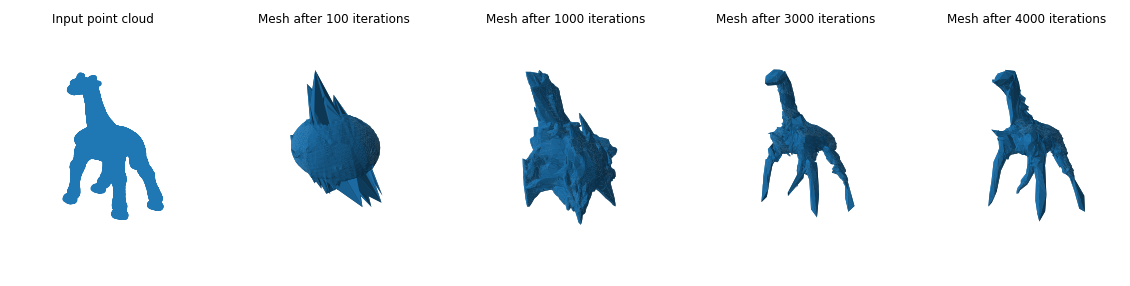

In [ ]:
# Sample points uniformly from the surface of the mesh.
fig = plt.figure(figsize=(20, 5))

ax = plt.subplot(151, projection='3d')
x, y, z = input_point_cloud[:,2], -input_point_cloud[:,1], input_point_cloud[:,0]
ax.scatter(x, z, -y)
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')
ax.set_title('Input point cloud')
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.view_init(10, 45)

ax = plt.subplot(152, projection='3d')
verts, faces, aux = load_obj(f'checkpoints/giraffe_sphere/recon_iter_100.obj')
faces_idx = faces.verts_idx.to('cpu')
verts = verts.to('cpu')
ax.plot_trisurf(verts[:,0], -verts[:,2], verts[:,1], triangles=faces_idx)
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')
ax.set_title('Mesh after 100 iterations')
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.view_init(10, -45)

ax = plt.subplot(153, projection='3d')
verts, faces, aux = load_obj(f'checkpoints/giraffe_sphere/recon_iter_1000.obj')
faces_idx = faces.verts_idx.to('cpu')
verts = verts.to('cpu')
ax.plot_trisurf(verts[:,0], -verts[:,2], verts[:,1], triangles=faces_idx)
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')
ax.set_title('Mesh after 1000 iterations')
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.view_init(10, -45)

ax = plt.subplot(154, projection='3d')
verts, faces, aux = load_obj(f'checkpoints/giraffe_sphere/recon_iter_3000.obj')
faces_idx = faces.verts_idx.to('cpu')
verts = verts.to('cpu')
ax.plot_trisurf(verts[:,0], -verts[:,2], verts[:,1], triangles=faces_idx)
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')
ax.set_title('Mesh after 3000 iterations')
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.view_init(10, -45)

ax = plt.subplot(155, projection='3d')
verts, faces, aux = load_obj(f'checkpoints/giraffe_sphere/recon_iter_4000.obj')
faces_idx = faces.verts_idx.to('cpu')
verts = verts.to('cpu')
ax.plot_trisurf(verts[:,0], -verts[:,2], verts[:,1], triangles=faces_idx)
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')
ax.set_title('Mesh after 4000 iterations')
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.view_init(10, -45)

plt.show()

In [ ]:
%run options.py

In [ ]:
options = Options()
opts = options.args

torch.manual_seed(opts.torch_seed)
device = torch.device('cuda:{}'.format(opts.gpu) if torch.cuda.is_available() else torch.device('cpu'))
print('device: {}'.format(device))

device: cuda:0


In [ ]:
opts.iterations = 6000
#opts.upsamp = 100
opts.input_pc = './data/giraffe.ply'
opts.initial_mesh = './data/ico_sphere_level_4.obj'
opts.save_path = './checkpoints/giraffe_sphere2'
opts.upsamp = 2000


In [ ]:
opts

Namespace(ang_wt=0.1, beamgap_iterations=0, beamgap_modulo=1, begin_samples=15000, convs=[16, 32, 64, 64, 128], export_interval=100, faces_to_part=[8000, 16000, 20000], global_step=False, gpu=0, init_weights=0.002, initial_mesh='./data/ico_sphere_level_4.obj', input_pc='./data/giraffe.ply', iterations=6000, leaky_relu=0.01, local_non_uniform=0.1, lr=0.00011, manifold_always=False, manifold_res=100000, max_faces=10000, overlap=0, pools=[0.0, 0.0, 0.0, 0.0], res_blocks=3, samples=25000, save_path='./checkpoints/giraffe_sphere2', torch_seed=5, transfer_data=False, unoriented=False, upsamp=2000)

In [ ]:
if not os.path.exists(opts.save_path):
    os.makedirs(opts.save_path)

In [ ]:
# initial mesh
mesh = Mesh(opts.initial_mesh, device=device, hold_history=True)

/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.vei = torch.from_numpy(np.concatenate(np.array(self.vei)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.nvsi = torch.Tensor(np.concatenate(np.array(self.nvsi)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested seque

In [ ]:
# input point cloud
input_xyz, input_normals = utils.read_pts(opts.input_pc)
# normalize point cloud based on initial mesh
input_xyz /= mesh.scale
input_xyz += mesh.translations[None, :]
input_xyz = torch.Tensor(input_xyz).type(options.dtype()).to(device)[None, :, :]
input_normals = torch.Tensor(input_normals).type(options.dtype()).to(device)[None, :, :]

In [ ]:
opts.initial_mesh

'./data/ico_sphere_level_4.obj'

In [ ]:
part_mesh = PartMesh(mesh, num_parts=options.get_num_parts(len(mesh.faces)), bfs_depth=opts.overlap)
print(f'number of parts {part_mesh.n_submeshes}')
net, optimizer, rand_verts, scheduler = init_net(mesh, part_mesh, device, opts)

beamgap_loss = BeamGapLoss(device)

if opts.beamgap_iterations > 0:
    print('beamgap on')
    beamgap_loss.update_pm(part_mesh, torch.cat([input_xyz, input_normals], dim=-1))

/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.vei = torch.from_numpy(np.concatenate(np.array(self.vei)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.nvsi = torch.Tensor(np.concatenate(np.array(self.nvsi)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested seque

number of parts 1


In [ ]:
%run utils.py

In [ ]:
for i in range(opts.iterations):
    num_samples = options.get_num_samples(i % opts.upsamp)
    if opts.global_step:
        optimizer.zero_grad()
    start_time = time.time()
    for part_i, est_verts in enumerate(net(rand_verts, part_mesh)):
        if not opts.global_step:
            optimizer.zero_grad()
        part_mesh.update_verts(est_verts[0], part_i)
        num_samples = options.get_num_samples(i % opts.upsamp)
        recon_xyz, recon_normals = sample_surface(part_mesh.main_mesh.faces, part_mesh.main_mesh.vs.unsqueeze(0), num_samples)
        # calc chamfer loss w/ normals
        recon_xyz, recon_normals = recon_xyz.type(options.dtype()), recon_normals.type(options.dtype())
        xyz_chamfer_loss, normals_chamfer_loss = chamfer_distance(recon_xyz, input_xyz, x_normals=recon_normals, y_normals=input_normals,
                                              unoriented=opts.unoriented)

        if (i < opts.beamgap_iterations) and (i % opts.beamgap_modulo == 0):
            loss = beamgap_loss(part_mesh, part_i)
        else:
            loss = (xyz_chamfer_loss + (opts.ang_wt * normals_chamfer_loss))
        if opts.local_non_uniform > 0:
            loss += opts.local_non_uniform * local_nonuniform_penalty(part_mesh.main_mesh).float()
        loss.backward()
        if not opts.global_step:
            optimizer.step()
            scheduler.step()
        part_mesh.main_mesh.vs.detach_()
    if opts.global_step:
        optimizer.step()
        scheduler.step()
    end_time = time.time()

    if i % 1 == 0:
        print(f'{os.path.basename(opts.input_pc)}; iter: {i} out of: {opts.iterations}; loss: {loss.item():.4f};'
              f' sample count: {num_samples}; time: {end_time - start_time:.2f}')
    if i % opts.export_interval == 0 and i > 0:
        print('exporting reconstruction... current LR: {}'.format(optimizer.param_groups[0]['lr']))
        with torch.no_grad():
            part_mesh.export(os.path.join(opts.save_path, f'recon_iter_{i}.obj'))

    if (i > 0 and (i + 1) % opts.upsamp == 0):
        mesh = part_mesh.main_mesh
        num_faces = int(np.clip(len(mesh.faces) * 1.5, len(mesh.faces), opts.max_faces))

        if num_faces > len(mesh.faces) or opts.manifold_always:
            # up-sample mesh
            mesh = utils.manifold_upsample(mesh, opts.save_path, Mesh,
                                           num_faces=min(num_faces, opts.max_faces),
                                           res=opts.manifold_res, simplify=True)

            part_mesh = PartMesh(mesh, num_parts=options.get_num_parts(len(mesh.faces)), bfs_depth=opts.overlap)
            print(f'upsampled to {len(mesh.faces)} faces; number of parts {part_mesh.n_submeshes}')
            net, optimizer, rand_verts, scheduler = init_net(mesh, part_mesh, device, opts)
            if i < opts.beamgap_iterations:
                print('beamgap updated')
                beamgap_loss.update_pm(part_mesh, input_xyz)

with torch.no_grad():
    mesh.export(os.path.join(opts.save_path, 'last_recon.obj'))

giraffe.ply; iter: 0 out of: 6000; loss: 0.3261; sample count: 15000; time: 0.58
giraffe.ply; iter: 1 out of: 6000; loss: 0.3260; sample count: 15006; time: 0.51
giraffe.ply; iter: 2 out of: 6000; loss: 0.3247; sample count: 15012; time: 0.50
giraffe.ply; iter: 3 out of: 6000; loss: 0.3220; sample count: 15018; time: 0.52
giraffe.ply; iter: 4 out of: 6000; loss: 0.3225; sample count: 15025; time: 0.51
giraffe.ply; iter: 5 out of: 6000; loss: 0.3258; sample count: 15031; time: 0.52
giraffe.ply; iter: 6 out of: 6000; loss: 0.3192; sample count: 15037; time: 0.61
giraffe.ply; iter: 7 out of: 6000; loss: 0.3158; sample count: 15043; time: 0.51
giraffe.ply; iter: 8 out of: 6000; loss: 0.3178; sample count: 15050; time: 0.51
giraffe.ply; iter: 9 out of: 6000; loss: 0.3137; sample count: 15056; time: 0.51
giraffe.ply; iter: 10 out of: 6000; loss: 0.3052; sample count: 15062; time: 0.51
giraffe.ply; iter: 11 out of: 6000; loss: 0.2931; sample count: 15068; time: 0.50
giraffe.ply; iter: 12 out 

/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.vei = torch.from_numpy(np.concatenate(np.array(self.vei)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.nvsi = torch.Tensor(np.concatenate(np.array(self.nvsi)).ravel()).to(self.device).long()
/content/drive/MyDrive/ML/logml/point2mesh/models/layers/mesh.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested seque

upsampled to 7680 faces; number of parts 1
giraffe.ply; iter: 2000 out of: 6000; loss: 0.0966; sample count: 15000; time: 0.85
exporting reconstruction... current LR: 0.00010999816666666667
giraffe.ply; iter: 2001 out of: 6000; loss: 0.0962; sample count: 15006; time: 0.82
giraffe.ply; iter: 2002 out of: 6000; loss: 0.0955; sample count: 15012; time: 0.85
giraffe.ply; iter: 2003 out of: 6000; loss: 0.0936; sample count: 15018; time: 0.82
giraffe.ply; iter: 2004 out of: 6000; loss: 0.0902; sample count: 15025; time: 0.92
giraffe.ply; iter: 2005 out of: 6000; loss: 0.0802; sample count: 15031; time: 0.82
giraffe.ply; iter: 2006 out of: 6000; loss: 0.0711; sample count: 15037; time: 0.82
giraffe.ply; iter: 2007 out of: 6000; loss: 0.0624; sample count: 15043; time: 0.83
giraffe.ply; iter: 2008 out of: 6000; loss: 0.0577; sample count: 15050; time: 0.89
giraffe.ply; iter: 2009 out of: 6000; loss: 0.0588; sample count: 15056; time: 0.91
giraffe.ply; iter: 2010 out of: 6000; loss: 0.0557; sa

In [ ]:
from pytorch3d.io import save_obj, load_obj

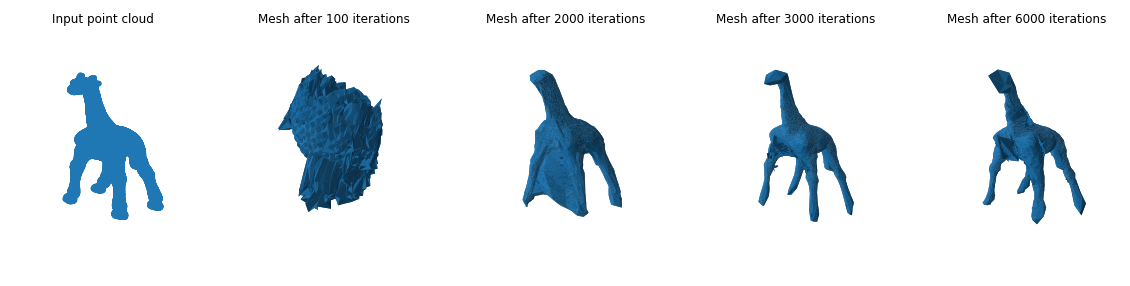

In [ ]:
# Sample points uniformly from the surface of the mesh.
fig = plt.figure(figsize=(20, 5))

ax = plt.subplot(151, projection='3d')
x, y, z = input_point_cloud[:,2], -input_point_cloud[:,1], input_point_cloud[:,0]
ax.scatter(x, z, -y)
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')
ax.set_title('Input point cloud')
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.view_init(10, 45)

ax = plt.subplot(152, projection='3d')
verts, faces, aux = load_obj(f'checkpoints/giraffe_sphere2/recon_iter_100.obj')
faces_idx = faces.verts_idx.to('cpu')
verts = verts.to('cpu')
ax.plot_trisurf(verts[:,0], -verts[:,2], verts[:,1], triangles=faces_idx)
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')
ax.set_title('Mesh after 100 iterations')
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.view_init(10, -45)

ax = plt.subplot(153, projection='3d')
verts, faces, aux = load_obj(f'checkpoints/giraffe_sphere2/recon_iter_2000.obj')
faces_idx = faces.verts_idx.to('cpu')
verts = verts.to('cpu')
ax.plot_trisurf(verts[:,0], -verts[:,2], verts[:,1], triangles=faces_idx)
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')
ax.set_title('Mesh after 2000 iterations')
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.view_init(10, -45)

ax = plt.subplot(154, projection='3d')
verts, faces, aux = load_obj(f'checkpoints/giraffe_sphere2/recon_iter_3000.obj')
faces_idx = faces.verts_idx.to('cpu')
verts = verts.to('cpu')
ax.plot_trisurf(verts[:,0], -verts[:,2], verts[:,1], triangles=faces_idx)
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')
ax.set_title('Mesh after 3000 iterations')
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.view_init(10, -45)

ax = plt.subplot(155, projection='3d')
verts, faces, aux = load_obj(f'checkpoints/giraffe_sphere2/recon_iter_5900.obj')
faces_idx = faces.verts_idx.to('cpu')
verts = verts.to('cpu')
ax.plot_trisurf(verts[:,0], -verts[:,2], verts[:,1], triangles=faces_idx)
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')
ax.set_title('Mesh after 6000 iterations')
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
ax.view_init(10, -45)

plt.show()